In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from selflearn import Interaction
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [2]:
life = Interaction()

In [3]:
life.inference_step()

/home/sergei/git/science/causality-disentanglement/debug/selflearn/selflearn.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


(tensor([[-2.7399, -2.2484, -2.9042,  ..., -2.3256, -2.3421, -1.9718],
         [-2.5024, -2.2009, -2.4324,  ..., -2.1689, -2.4764, -2.2214],
         [-2.3776, -2.2861, -2.2775,  ..., -2.2440, -2.3369, -2.2385],
         ...,
         [-2.5208, -2.2222, -2.4935,  ..., -2.2527, -2.4562, -2.2389],
         [-2.3732, -2.1386, -2.4673,  ..., -2.2370, -2.3620, -2.3080],
         [-3.0174, -1.9486, -2.3289,  ..., -1.8622, -2.1396, -2.1572]],
        device='cuda:0', grad_fn=<LogSoftmaxBackward>),
 tensor(0.9258, device='cuda:0', grad_fn=<ExpBackward>))

In [5]:
stats = {'lr': [], 'loss': []}

In [6]:
for _ in tqdm(range(1000)):
    life.selflearn()

    stats['lr'].append(life.lr_out.item())
    stats['loss'].append(life.model.loss.item())

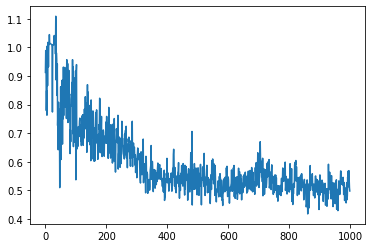

In [7]:
plt.plot(stats['lr'])

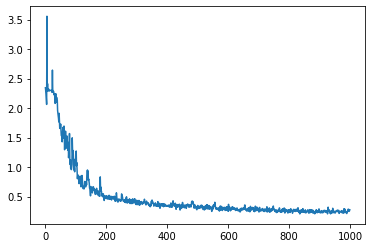

In [8]:
plt.plot(stats['loss'])

In [15]:
_, (x, y) = next(enumerate(life.data[0]))

In [25]:
np.argmax(life.model(x.to(life.device)).cpu().detach().numpy(), axis=1)

array([6, 1, 9, ..., 4, 6, 9])

In [26]:
y

tensor([6, 0, 9,  ..., 4, 6, 9])